#  Amazon Machine Learning Notebook

#### First, list the S3 buckets in your environment:

In [6]:
!aws s3 ls

2018-08-08 21:23:19 cfst-865-6deab924eb0eb865a7bc874fa7843bf-s3bucket-1bzd3v4mlkssr


___
#### Once you have the S3 bucket name, set the "bucket" variable to equal your S3 bucket:

In [7]:
bucket='cfst-865-6deab924eb0eb865a7bc874fa7843bf-s3bucket-1bzd3v4mlkssr'
print(bucket)

cfst-865-6deab924eb0eb865a7bc874fa7843bf-s3bucket-1bzd3v4mlkssr


___
#### Here, we'll import pandas, matplotlib.pyplot, and seaborn. Only pandas is required for the learning activity, but feel free to import the others to play around with the data:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

___
#### Now, read in the 'Facebook_dataset.csv' file stored in the current directory and set that as the "dataset" variable. After that, display the head of the file:

In [10]:
dataset = pd.read_csv('Facebook_dataset.csv')
dataset.head()

,PageLikes,Type,Month,Weekday,Hour,Paid,Total
0,139441,Photo,12,3,3,0,80
1,139441,Photo,12,4,3,0,100
2,139441,Photo,12,5,10,0,104
3,139441,Photo,12,5,10,0,106
4,139441,Photo,12,6,10,0,142


___
#### Read in the 'Facebook_batch.csv' file without a header and set it as "batch". Then display the head of "batch". 

In [12]:
batch = pd.read_csv('Facebook_batch.csv', header=None)
batch.head()

,0,1,2,3,4,5
0,138458,Status,12,5,11,0
1,137893,Photo,11,3,2,1
2,86909,Photo,1,4,11,0
3,113028,Photo,4,6,14,0
4,137893,Video,11,5,3,1


___
#### Now, upload the Facebook_dataset.csv and Facebook_batch.csv to S3 in order to be used by the Amazon Machine Learning service: 

In [15]:
!aws s3 cp Facebook_dataset.csv s3://$bucket
!aws s3 cp Facebook_batch.csv s3://$bucket

upload: ./Facebook_dataset.csv to s3://cfst-865-6deab924eb0eb865a7bc874fa7843bf-s3bucket-1bzd3v4mlkssr/Facebook_dataset.csv
upload: ./Facebook_batch.csv to s3://cfst-865-6deab924eb0eb865a7bc874fa7843bf-s3bucket-1bzd3v4mlkssr/Facebook_batch.csv


___
#### After the machine learning operations have completed and the batch file has been analyzed, take a look at the batch-prediction/result folder in S3 to see the contents:

In [18]:
!aws s3 ls s3://$bucket/batch-prediction/result/

2018-08-08 20:36:48        199 bp-7uD9VKnikNV-Facebook_batch.csv.gz


___
#### Copy the result file to the home directory:

In [20]:
!aws s3 cp --recursive s3://$bucket/batch-prediction/result/ .

download: s3://cfst-865-b5137df127d7e0ebbc990974dccf296-s3bucket-14btq19bomey/batch-prediction/result/bp-7uD9VKnikNV-Facebook_batch.csv.gz to ./bp-7uD9VKnikNV-Facebook_batch.csv.gz


___
#### Unzip the gz file in order to access the csv contained within:

In [22]:
!gunzip bp-7uD9VKnikNV-Facebook_batch.csv.gz

___
#### Read in the results file as "res" and view the head:

In [26]:
res = pd.read_csv('bp-7uD9VKnikNV-Facebook_batch.csv')
res.head()

,score
0,154.3379
1,235.0810
2,189.8898
3,171.9040
4,192.4330


___
#### Concatenate the "res" and "batch" dataframes as "results" in order to see the estimated number of likes based on the inputs:

In [34]:
results = pd.concat([batch,res], axis=1)

___
#### Set the columns for the "results" dataframe in order to change "score" to "Likes". Then sort the values by "Likes". 

In [40]:
results.columns = ['Page total likes','Type','Month','Weekday','Hour','Paid','Likes']
results.sort_values('Likes',ascending=False)

,Page total likes,Type,Month,Weekday,Hour,Paid,Likes
36,130791,Photo,7,3,5,1,302.0189
7,127082,Photo,7,3,3,1,300.7544
17,128032,Photo,7,4,5,1,291.0863
13,130791,Photo,7,5,3,0,269.2970
21,129600,Photo,7,5,3,0,269.2970
9,128032,Photo,7,7,3,0,253.4409
34,135428,Photo,9,3,10,0,242.9751
10,138414,Photo,12,4,5,1,240.2804
27,135195,Photo,9,6,3,1,236.8264
1,137893,Photo,11,3,2,1,235.0810


___
#### *Optional: run a Seaborn pairplot or any other analysis you wish to perform to analyze the data. 

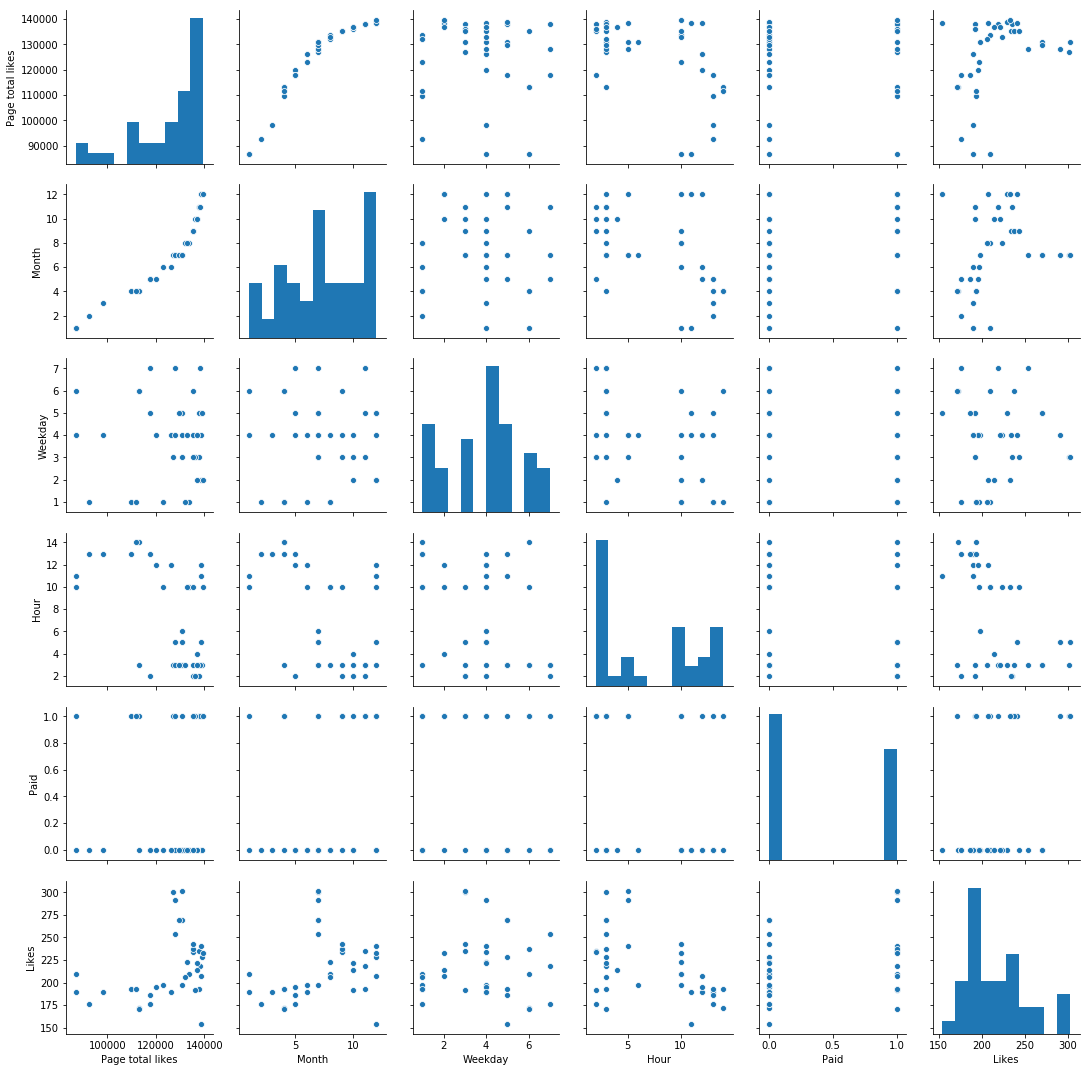

In [43]:
sns.pairplot(data=results)

___
# Congratulations! You've completed the learning actvity! 